# Preliminaries

In [1]:
options(jupyter.plot_scale=1,
        width=200,
        repr.matrix.max.cols=200,
        repr.matrix.max.rows=Inf)

In [2]:
require(devtools)
remake <- TRUE
if (remake) {
    remove.packages("standardcor")
}

Loading required package: devtools

Loading required package: usethis

Removing package from ‘/home/maxr/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [3]:
if (! require("standardcor")) {
    install_github("longevity-consortium/standardcor")
    require("standardcor")
}

Loading required package: standardcor

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘standardcor’”




── R CMD build ────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpXVaUNz/remotes4f2444777bc99/longevity-consortium-standardcor-9457b4d/DESCRIPTION’
─  preparing ‘standardcor’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘standardcor_0.1.0.tar.gz’
   


Installing package into ‘/home/maxr/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Loading required package: standardcor

Loading required package: qlcMatrix

Loading required package: Matrix

Loading required package: slam

Loading required package: sparsesvd



In [4]:
println <- function(...) { cat(noquote(paste(...,"\n"))) }


# Documentation

In [5]:
ls("package:standardcor")

[1] "betaDistance"            "centerBeta"              "e2d"                     "estimateShape"           "euclidDistance"          "interpolatedAdjacency"   "multiOmicModel"         
 [8] "nullModelAdjacencyTable" "powerDistance"           "sigmoidDistance"         "SparseSpearmanCor2"      "SparsifiedRanks2"        "standardizeFromModel"    "synth_LC"               
[15] "ue2d"

In [6]:
?standardcor::standardcor

standardcor-package {standardcor},R Documentation


In [7]:
?standardcor::SparsifiedRanks2

SparsifiedRanks2 {standardcor},R Documentation
X,A sparse data matrix
Y,"A second sparse data matrix. If only X is provided, the columns of X will be correlated with each other; when Y is also specified, the columns of X are cross-correlated with the columns of Y."


In [8]:
?standardcor::SparseSpearmanCor2

SparseSpearmanCor2 {standardcor},R Documentation
X,A sparse data matrix
Y,"A second sparse data matrix. If only X is provided, the columns of X will be correlated with each other; when Y is also specified, the columns of X are cross-correlated with the columns of Y."
cov,An optional covariance matrix to use in computing the correlations. Passed to qlcMatrix::corSparse().


In [9]:
?standardcor::betaDistance

betaDistance {standardcor},R Documentation
r,A numeric object containing correlation coefficients
v,The first shape parameter of a 2-parameter Beta distribution
w,The second shape parameter of a 2-parameter Beta distribution
mix,"The relative weight of squared Euclidean distance to the Beta distance penalty. When mix = 0, only the Beta distance is used and any correlation significantly beyond the null distribution is essentially at zero distance. When mix = 1, the only correlation corresponding to zero distance is +/-1, and the Beta distance acts as a penalty on top of the squared Euclidean distance. While intermediate values are allowed, they are not recommended."
unsigned,"If TRUE (the default), computes distance from association (|r|) instead of correlation (r)."


In [10]:
?standardcor::centerBeta

centerBeta {standardcor},R Documentation
r,The correlation to center
v,The first parameter of the Beta distribution
w,The second parameter of the Beta distribution
nu,The parameter of the target Beta distribution


In [11]:
?standardcor::estimateShape

estimateShape {standardcor},R Documentation
corSet,"A vector of non-unique, non-self correlation coefficients."
left,"An adjustment to the estimated value of w. This parameter is provided so the effect of changing the estimated v parameter can be assessed in the plot. Note that the mean of Beta(v,w) is v/(v+w), adding to w moves the mean to the left."
right,An adjustment to the estimated value of v. Adding to the value of v moves the mean of the Beta distribution to the right; Adding to both v and w decreases the variance.
plot,"If TRUE, a plot of the distribution is shown, along with the fitted distribution Beta(v,w). If ev and ew are the estimated parameters, v = ev + right, w = ew + left."
fine,"Half the number of bins for the histogram. When fine = NULL (the default), an appropriate value between 5 and 100 is used."
trim,"The mean of the correlations is estimated robustly by making an initial Beta model, then trimming values below quantile trim/2 and above quantile 1-trim/2 of the initial model (0 <= trim < 1). If trimming reduces the number of correlations that remain to less than five, trimming is disabled and the full set of correlations is used."


### Estimating Beta distributions -- additional details


The Method of Moments estimates the Beta distribution from the mean and the variance,
neither of which is robust to outliers. There is no closed-form representation of
the median of the Beta distribution, but there is one for the mode. Here I will
use the observed mode and its density to make a second estimate of $v$ and $w$.
The estimate from the mean tends to underestimate $z = v+w$, while the estimate from the
mode tends to overestimate $z$. Together, they provide the ability to trim
outliers and repeat the Method of Moments estimate of the mean, $mu = v / z$.
We then combine this mean with the better estimate of $z$.

To estimate from the mode, note that
$$\begin{align}
{\rm dbeta}(x \mid v,w) &= Pr\{ x \mid x \sim {\rm Beta}{(v,w)} \}\\ 
 &= \frac{x^{(v-1)} (1-x)^{(w-1)}}{{\rm Beta}{(v,w)}}.
\end{align}$$
This is maximized at the mode $m = (v-1) / (z-2)$. We can estimate the mode and its
density $D_m = {\rm dbeta}{(m \mid v, w)}$ by considering density within small intervals.
We then optimize an estimate of $z$ to match $m$ and $D_m$; a reasonable heuristic
starting point is $z = 2 D_m^2$. The estimates of $v$ and $w$ from $m$ and $z$ are
$$
\begin{align}
v &= 1 + m (z-2),\\ 
w &= z - v.
\end{align}
$$


In [12]:
?standardcor::euclidDistance

euclidDistance {standardcor},R Documentation
mat,A matrix of correlation coefficients
v,The first parameter of the beta distribution
w,The second parameter of the beta distribution
type,The type of distance to calculate


In [13]:
?standardcor::powerDistance

powerDistance {standardcor},R Documentation
r,"Correlation coefficient(s), -1 <= r <= 1."
k,The power parameter.
unsigned,"If TRUE, this function computes distances based on unsigned associations (|r|), otherwise it computes distances based on signed correlations (r)."


In [14]:
?standardcor::sigmoidDistance

sigmoidDistance {standardcor},R Documentation
r,Correlation coefficient(s)
alpha,The alpha parameter of the sigmoid function (the log of the slope at tau0)
tau0,The tau0 parameter of the sigmoid function (the correlation value corresponding to distance = 0.5)
stretch,"If TRUE, the distances are rescaled to the range 0..1. (default: stretch=FALSE)"
type,"The interpretation of the correlation coefficient signed (correlation) or unsigned (association, default). Any value other than ""unsigned"" is interpreted as signed."


In [15]:
?standardcor::multiOmicModel

multiOmicModel {standardcor},R Documentation
OmicsL,A named list of datasets. Each dataset may be a matrix (internal dataset) or the name of an RDS file containing a matrix (external dataset). The matrices are interpreted as rows representing samples and columns representing analytes; the analyte names must be unique across all datasets.
common,"When TRUE (the default), only samples common to all datasets will be used to compute correlations. Otherwise, correlations will be computed across all samples shared by each individual pair of datasets. While requiring all correlations to depend on a common set of samples, setting common to FALSE permits all available data to contribute to each cross-correlation; it is up to the user to decide when this is appropriate."
min.samples,"A lower limit on the number of samples from which analyte-analyte correlations may be computed. This parameter is used to ensure that datasets overlap sufficiently on samples to provide at least a minimal ability to compute correlations between analytes. When a common set of samples is required across all datasets, this parameter is the minimum length of the common set of samples; otherwise the min.samples is the minimum number of samples shared by each pair of 'Omics datasets independently."


In [16]:
?standardcor::standardizeFromModel

standardizeFromModel {standardcor},R Documentation
modelL,"A list-of-lists structure providing two inputs for each pair of 'Omics datasets A and B: a matrix modelL[[A]][[B]][['cor']] of raw Spearman correlation values, and shape parameters modelL[[A]][[B]][['shape']] == c(v,w) specifying a null model (1+r_raw)/2 ~ Beta(v,w) for the raw correlations."
v.std,
analtyeL,"For each 'Omics dataset A, analyteL[[A]] lists the analytes provided by dataset A. These analyte identifiers are required to be unique across all datasets."


In [17]:
?standardcor::nullModelAdjacencyTable

nullModelAdjacencyTable {standardcor},R Documentation
uniqueCor,"A numeric object containing the full set of non-self, unique correlation values to consider. If the analyte-analyte correlation matrix is Z, the non-self, unique correlations can be found using Z[row(Z) < col(Z)]."
v,"The parameter for the null model of random correlations, Prr | null model = Prx <= Beta(v, v) | x = (1+r)/2."
scale,"Center of the soft threshold relative to the estimated number of correlations beyond those that fit the null model. Defaults to 2; higher values increase the connectivity of the network model, lower values decrease it."


In [18]:
?standardcor::interpolatedAdjacency

interpolatedAdjacency {standardcor},R Documentation
r,A numeric object containing (standardized) correlation coefficients
adjTable,"A tabulated soft-threshold adjacency function, as produced by nullModelAdjacencyTable()"


# Exploring betaDistance.R

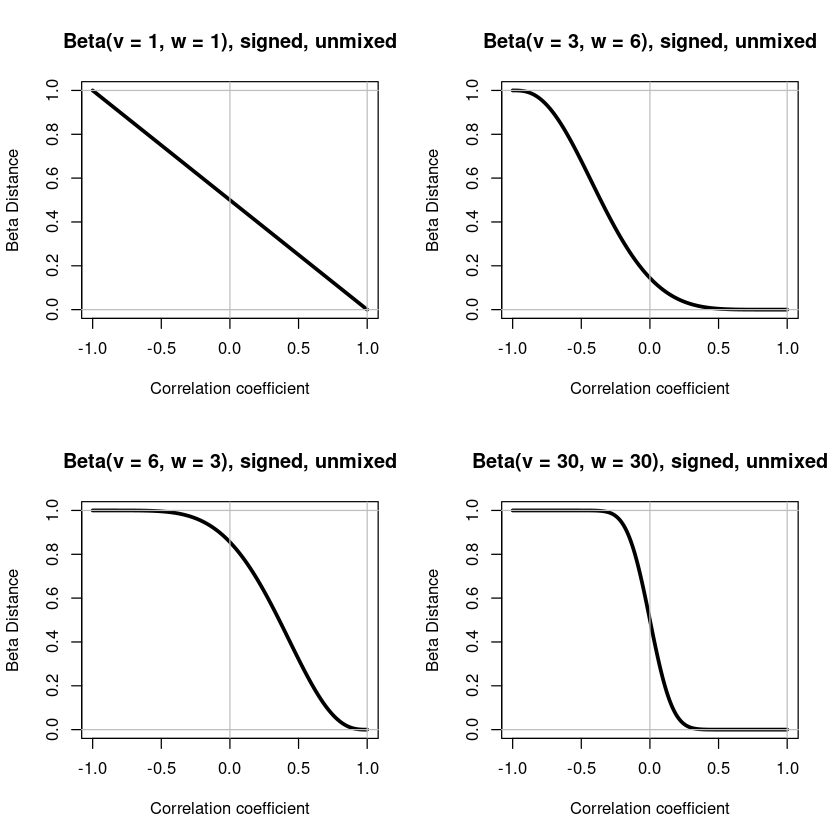

In [19]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1,mix=0,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6, mix=0, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3, mix=0,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30,mix=0,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

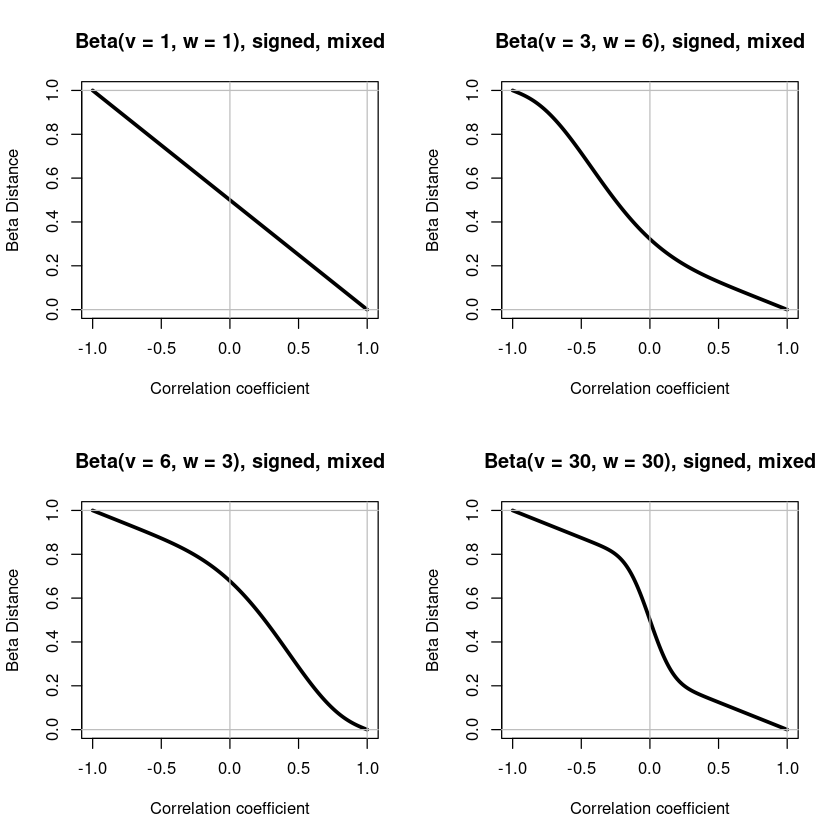

In [20]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1,mix=1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6, mix=1, unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3, mix=1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30,mix=1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

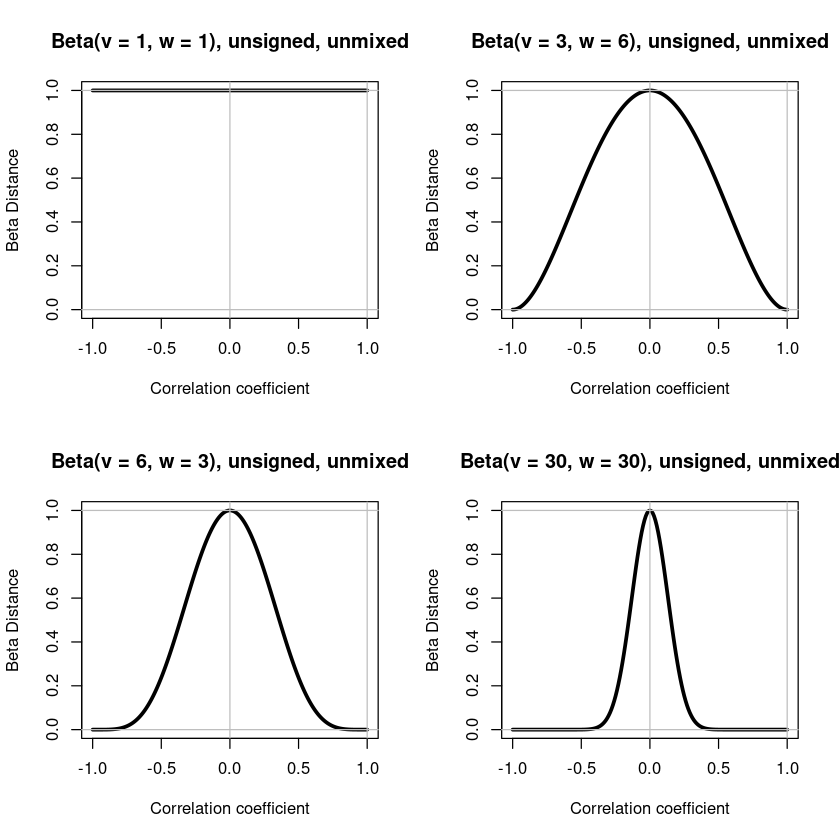

In [21]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1,mix=0),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6, mix=0),type='l',lwd=3, ylim=c(0,1), # w = 6 is ignored
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3, mix=0),type='l',lwd=3, ylim=c(0,1), # w = 3 is ignored
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30,mix=0),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

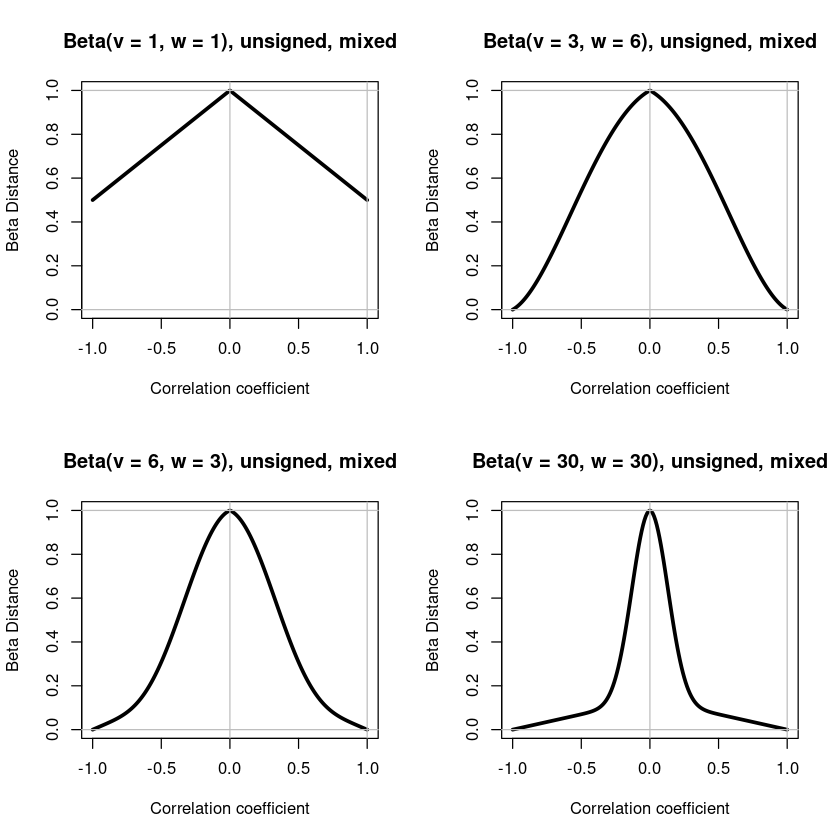

In [22]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

# Exploring powerDistance.R

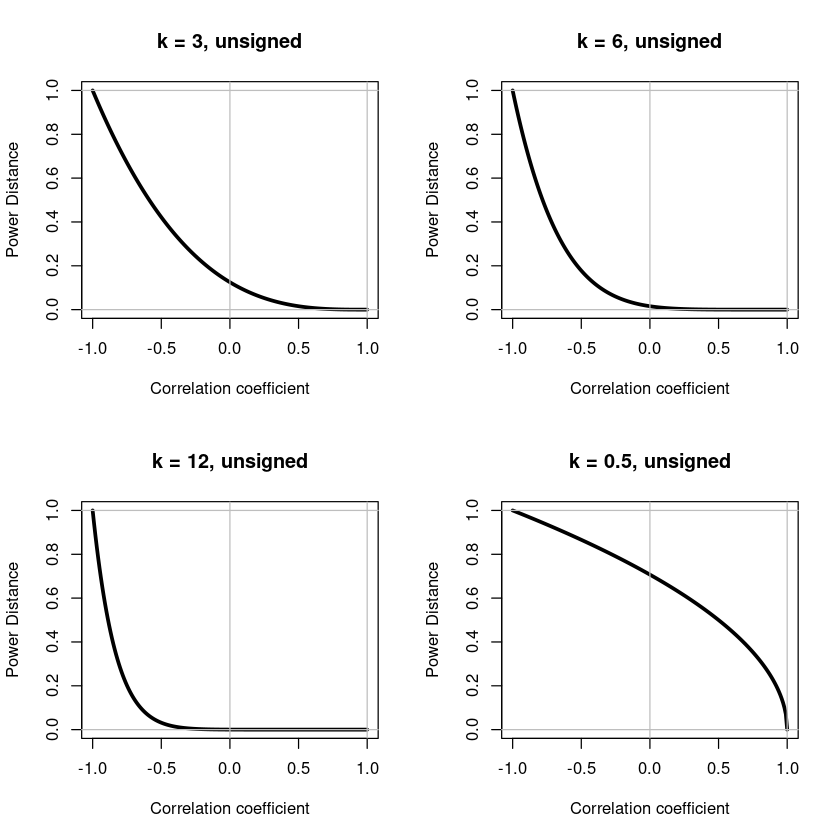

In [23]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,powerDistance(R,k=3,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 3, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=6, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 6, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=12, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 12, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=0.5, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 0.5, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

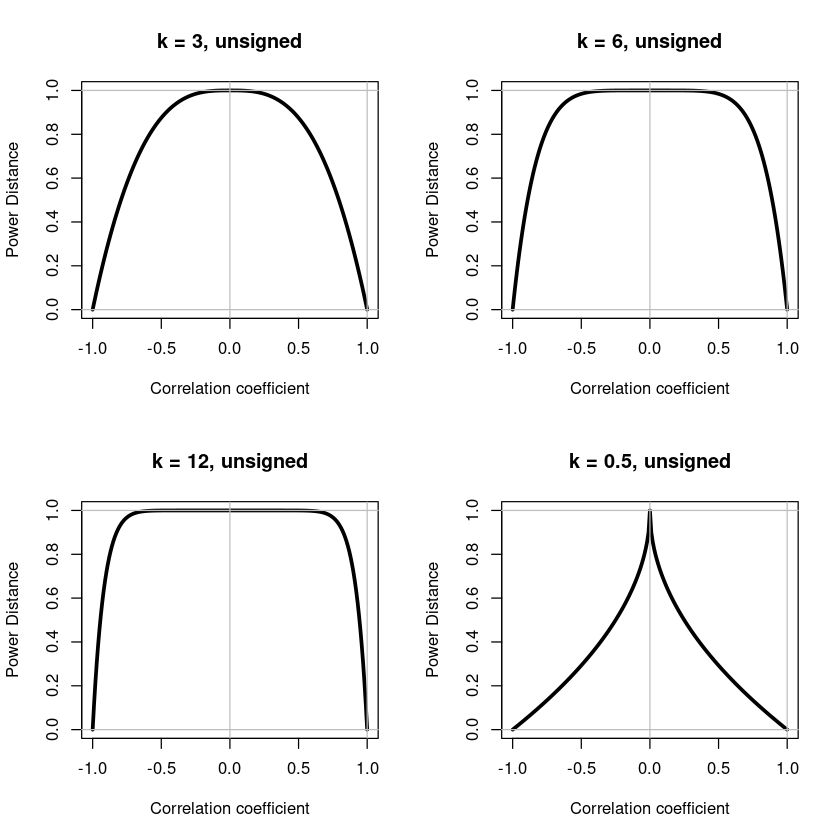

In [24]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,powerDistance(R,k=3),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 3, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=6),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 6, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=12),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 12, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=0.5),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 0.5, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

# Exploring sigmoidDistance.R

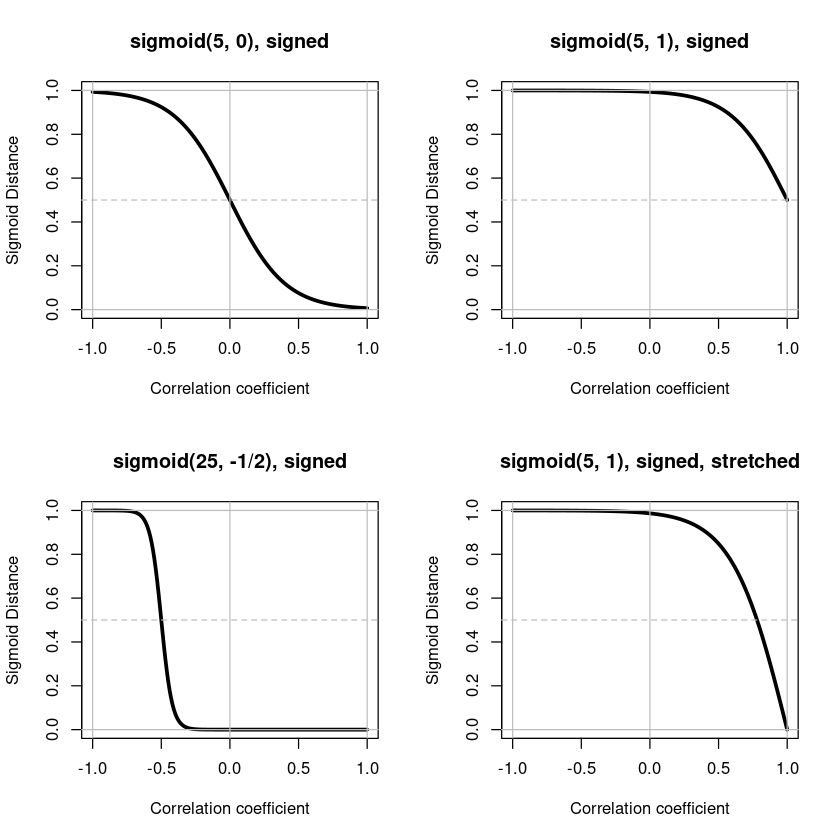

In [25]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,sigmoidDistance(R,alpha=5,tau0 = 0,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(5, 0), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=5,tau0 = 1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(5, 1), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=25,tau0 = -0.5,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(25, -1/2), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=5,tau0 = 1,unsigned=FALSE, stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(5, 1), signed, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')


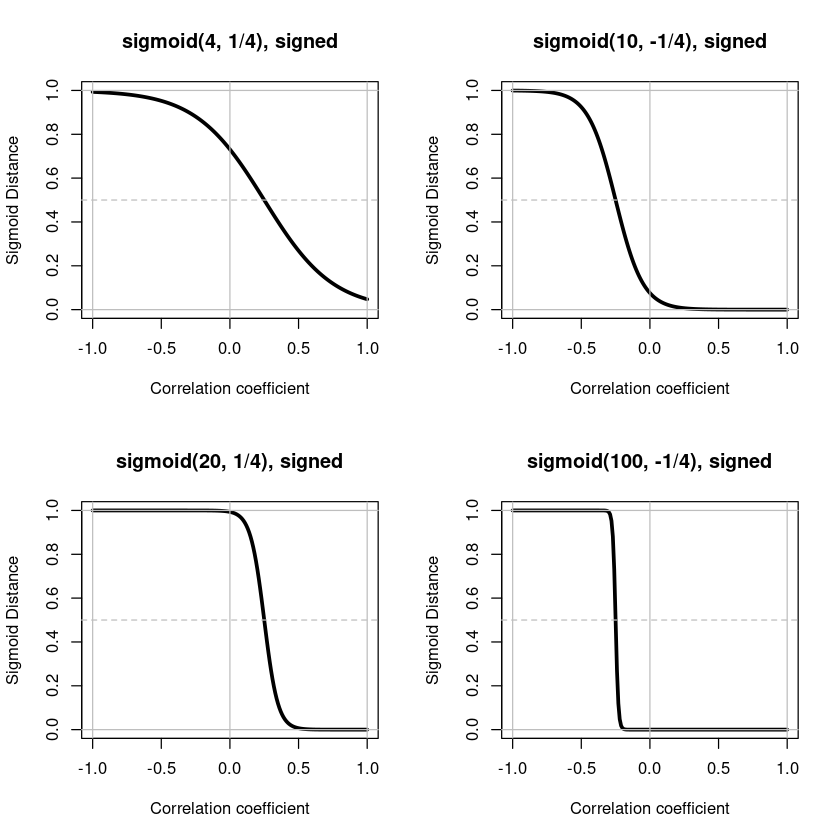

In [26]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,sigmoidDistance(R,alpha=4,tau0 = 1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(4, 1/4), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=10,tau0 = -1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(10, -1/4), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=20,tau0 = 1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(20, 1/4), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=100,tau0 = -1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(100, -1/4), signed",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')


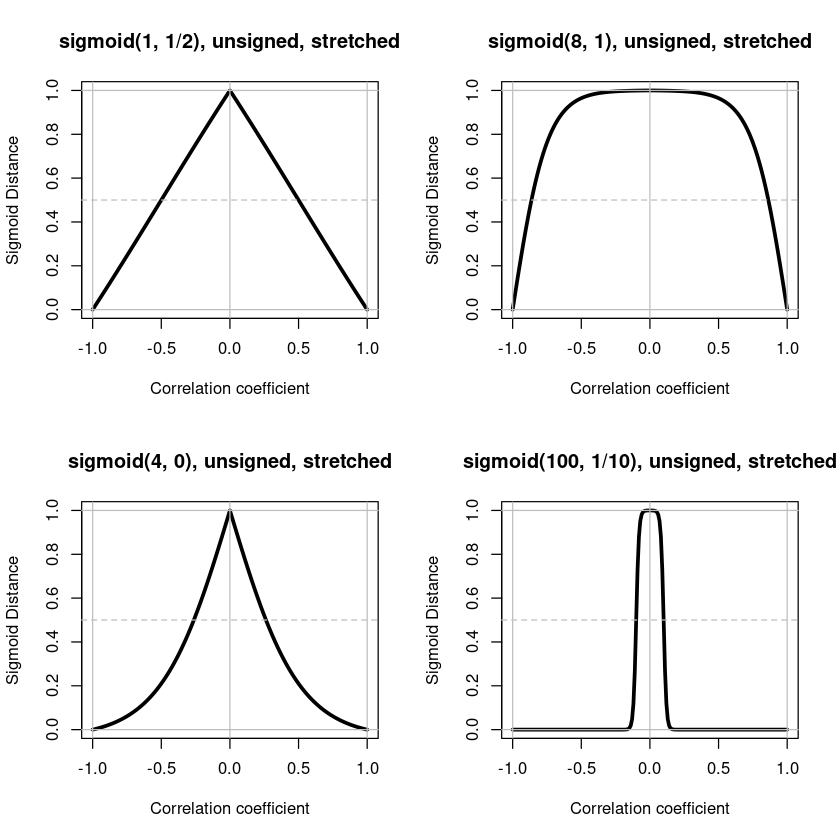

In [27]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,sigmoidDistance(R,alpha=1,tau0 = 1/2,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(1, 1/2), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=8,tau0 = 1,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(8, 1), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=4,tau0 = 0,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(4, 0), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=100,tau0 = 1/10,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(100, 1/10), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')


# Examples of estimateShape.R

The first example estimates the parameters of an (asymmetric) Beta distribution ${\rm Beta}(v,w)$ from data generated entirely from a null distribution of correlations among vectors of length $D = 50$. Theoretically, this distribution should be ${\rm Beta}(v,v), v = D/2 - 1 = 24$; This example shows that estimateShape() does a good job of fitting this data.

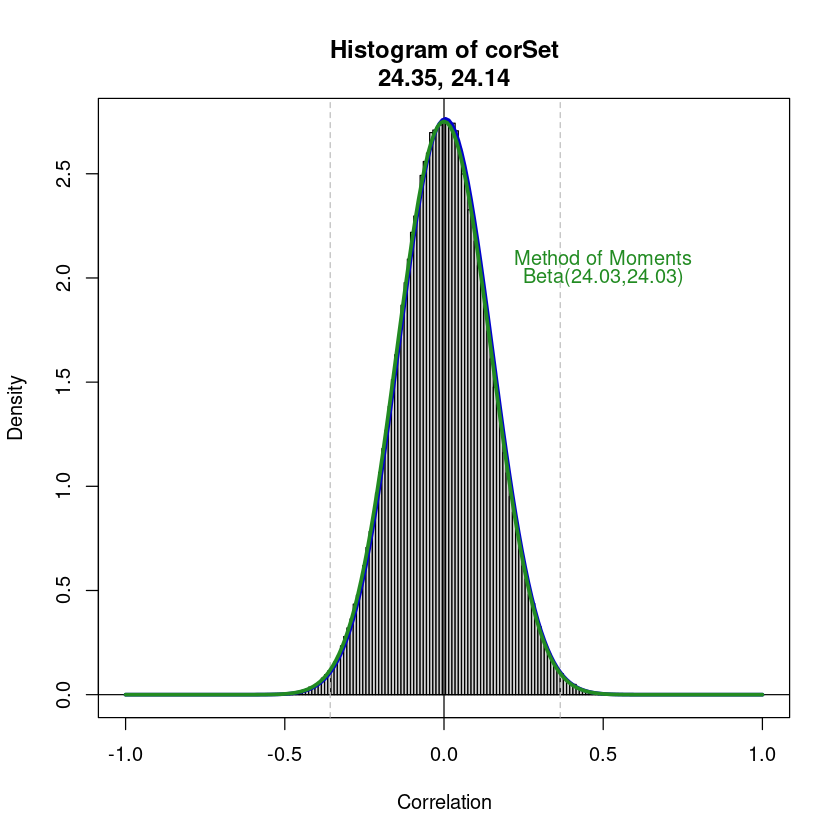

In [28]:
Samples <- 1000
Dimensions <- 50
M <- Matrix(rnorm(Dimensions*Samples),nrow=Dimensions,ncol=Samples,sparse=TRUE)
Z <- SparseSpearmanCor2(M)

beta.shape <- estimateShape(Z[row(Z) < col(Z)], plot=TRUE)
title(paste(round(beta.shape,2),collapse=", "),line=0.5)
#text(x=-0.5,y=2.0,labels=paste("D/2 - 1 = ",round(Dimensions/2-1, 2)),adj = 1/2)

R <- c(-100:100)/100 ; R <-ifelse(-1 < R, ifelse(R < 1, R, 1), -1) # Ensure R in [-1,1]

x     <- (1+Z[row(Z) < col(Z)])/2
x.mu  <- mean(x)
x.var <- var(x)
z.mm <- x.mu*(1-x.mu) / x.var - 1
v.mm <- x.mu * z.mm
w.mm <- (1-x.mu) * z.mm

lines(R,dbeta((1+R)/2, v.mm, w.mm)/2, lwd=3, col='forestgreen')
text(x=0.5,y=c(2.1,2),
     labels=c("Method of Moments",paste("Beta(",round(v.mm, 2),",",round(w.mm,2),")",sep='')),
     col='forestgreen',adj = 1/2)


The second example below estimates the parameters of a null model for the same data, except that 20% of the vectors are now 50% correlated to each other. These correlations, which are not from the null model, involve 4% of all unique, non-identical pairs. The null model, representing the other 96% of the pairs, should be identical to the previous example. In this example, we can see that the Method of Moments estimate, which is perfectly appropriate for the first example, tries to include all correlations rather than just those from the null model. As a result, the fitted distribution does not reflect the null model very well. In contrast, estimateShape() does much better at modeling just the correlations that are truly from the null model.

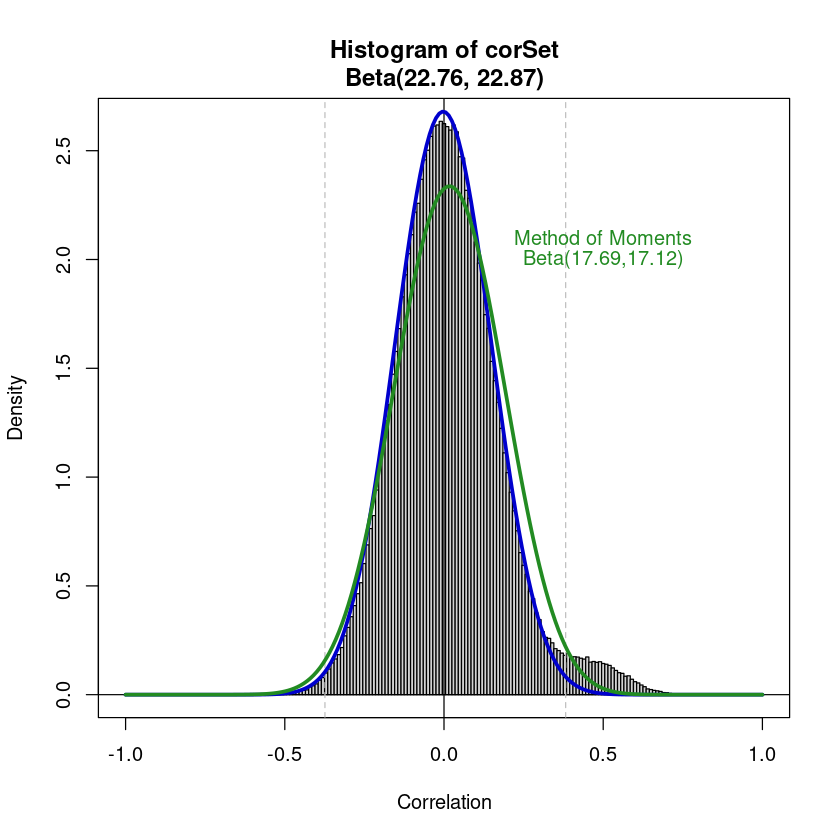

In [29]:
Samples <- 1000
Dimensions <- 50
M <- Matrix(rnorm(Dimensions*Samples),nrow=Dimensions,ncol=Samples,sparse=TRUE)
Altered <- 200 # This 5% of the samples are officially "outliers"
r <- 0.5
M[,c(1:Altered)] <- (1-r) * M[,c(1:Altered)] + r*M[,Altered+1]
Z <- SparseSpearmanCor2(M)
beta.shape <- estimateShape(Z[row(Z) < col(Z)], plot=TRUE)
title(paste("Beta(",paste(round(beta.shape,2),collapse=", "),")",sep=''),line=0.5)
#text(x=-0.5,y=2.0,labels=paste("D/2 - 1 = ",round(Dimensions/2-1, 2)),adj = 1/2)

R <- c(-100:100)/100 ; R <-ifelse(-1 < R, ifelse(R < 1, R, 1), -1) # Ensure R in [-1,1]

x     <- (1+Z[row(Z) < col(Z)])/2
x.mu  <- mean(x)
x.var <- var(x)
z.mm <- x.mu*(1-x.mu) / x.var - 1
v.mm <- x.mu * z.mm
w.mm <- (1-x.mu) * z.mm

lines(R,dbeta((1+R)/2, v.mm, w.mm)/2, lwd=3, col='forestgreen')
text(x=0.5,y=c(2.1,2),
     labels=c("Method of Moments",paste("Beta(",round(v.mm, 2),",",round(w.mm,2),")",sep='')),
     col='forestgreen',adj = 1/2)


In our third example, we show the difference between using the null model directly as a distance versus using the null model as a penalty on top of the typical Euclidean distance corresponding to a corrolation coefficient. The betaDistance() function penalizes correlation coefficients which are likely under the null model, but doesn't penalize correlation coefficients which are larger than those predicted by the null model. Without including the Euclidean distance, there is essentially no distance between highly correlated pairs; but by including the Euclidean distance, highly correlated pairs can still be separated by their degree of correlation.

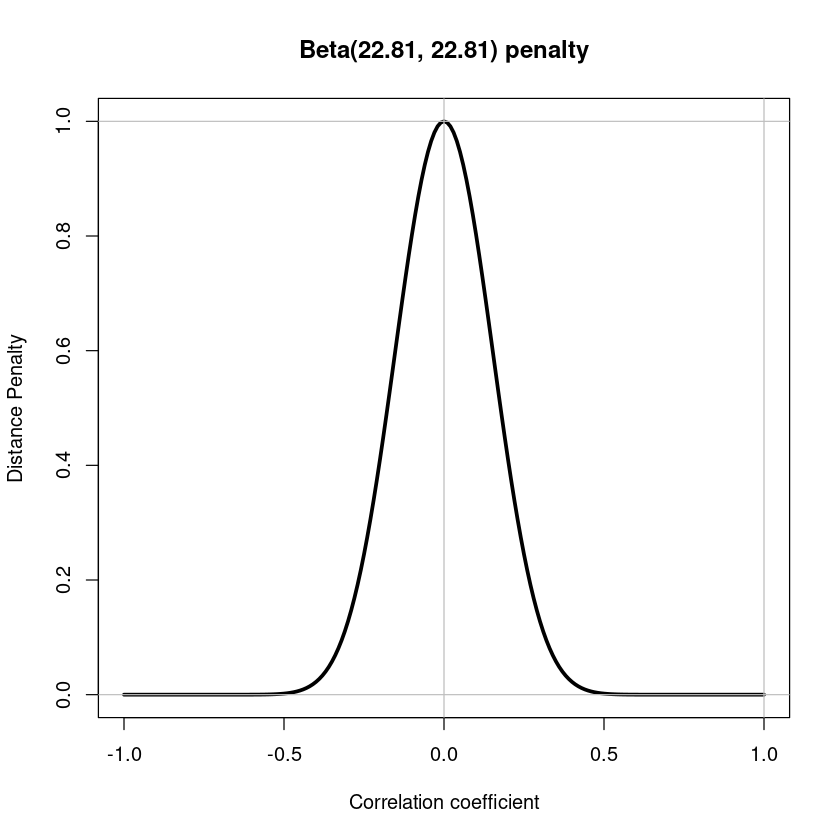

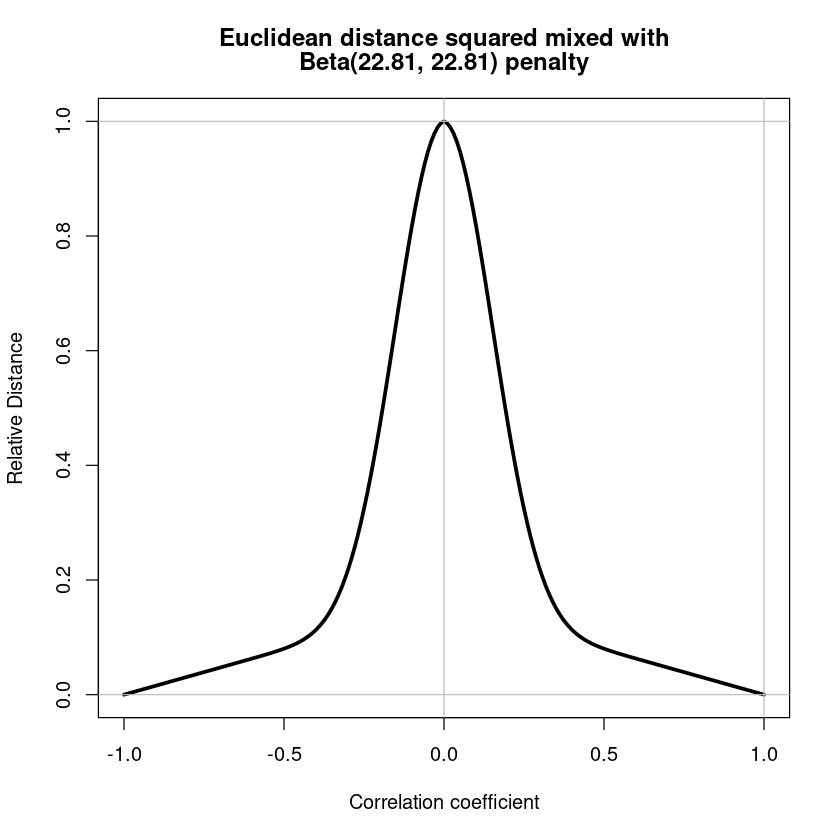

In [30]:
v <- mean(beta.shape) # Expect v = (D-1)/2 = 24.5
v.name <- paste("Beta(",paste(round(c(v,v),2),collapse=", "),")",sep='')
plot(R,betaDistance(R, v, v, mix=0), type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Distance Penalty",
    main = paste(v.name,"penalty"))
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, v, v, mix=1),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Relative Distance",
    main = c("Euclidean distance squared mixed with",
             paste(v.name, "penalty")))
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

# Automated handling of multi-omic data

In [31]:
data('synth_LC')
names(synth_LC) <- c('Metadata','Metabolomics','Proteomics')


In [32]:
xtabs(~ synth_LC[['Metadata']]$CASE)
println('Metabolomics',paste(dim(synth_LC[['Metabolomics']]),collapse=' x '))
println('Proteoomics',paste(dim(synth_LC[['Proteomics']]),collapse=' x '))

synth_LC[["Metadata"]]$CASE
  0   1 
299 201 

Metabolomics 500 x 2647 
Proteoomics 500 x 284 


In [33]:
Z.met <- SparseSpearmanCor2(as.matrix(synth_LC[['Metabolomics']]))
dim(Z.met)
length(which(is.na(Z.met)))
range(Z.met,na.rm=TRUE)

[1] 2647 2647

[1] 0

[1] -0.8189155  1.0000000

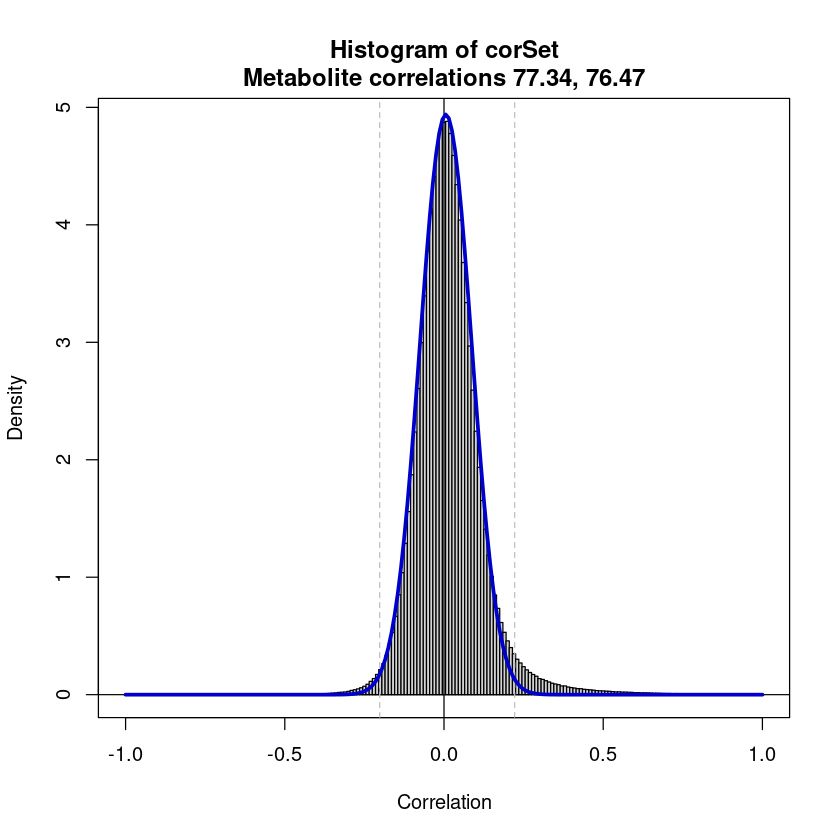

In [34]:
shape.Met <- estimateShape(Z.met[row(Z.met) < col(Z.met)], plot=TRUE)
title(paste('Metabolite correlations',paste(round(shape.Met,2),collapse=", ")),line=0.5)
#text(x=-0.5,y=2.0,labels=paste("D/2 - 1 = ",round(Dimensions/2-1, 2)),adj = 1/2)

In [35]:
Z.prot <- SparseSpearmanCor2(as.matrix(synth_LC[['Proteomics']]))
println("Proteomics correlation matrix",paste(dim(Z.prot),collapse=' x '))
println(length(which(is.na(Z.prot))),'na values')
println(paste(range(Z.prot,na.rm=TRUE),collapse=" <= cor <= "))

Proteomics correlation matrix 284 x 284 
0 na values 
-0.641119940479762 <= cor <= 1 


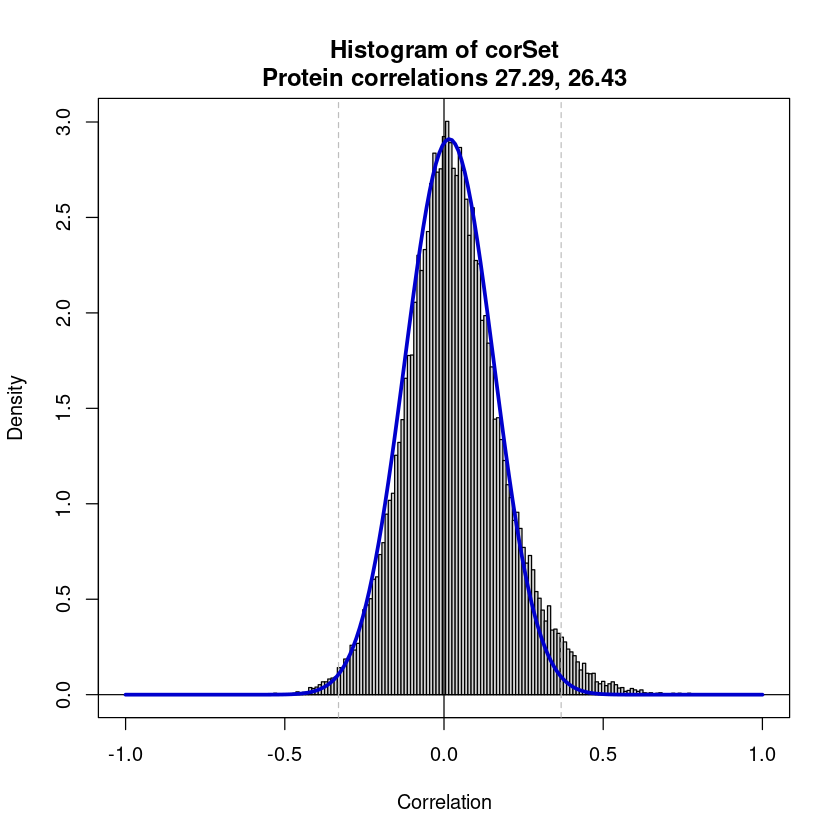

In [36]:
shape.prot <- estimateShape(Z.prot[row(Z.prot) < col(Z.prot)], plot=TRUE)
title(paste('Protein correlations',paste(round(shape.prot,2),collapse=", ")),line=0.5)

In [37]:
N <- dim(synth_LC[['Metabolomics']])[2]
Met <- as.matrix(synth_LC[['Metabolomics']][,2:N])
rownames(Met) <- as.character(synth_LC[['Metabolomics']][,1])

In [38]:
N <- dim(synth_LC[['Proteomics']])[2]
Prot <- as.matrix(synth_LC[['Proteomics']][,2:N])
rownames(Prot) <- as.character(synth_LC[['Proteomics']][,1])

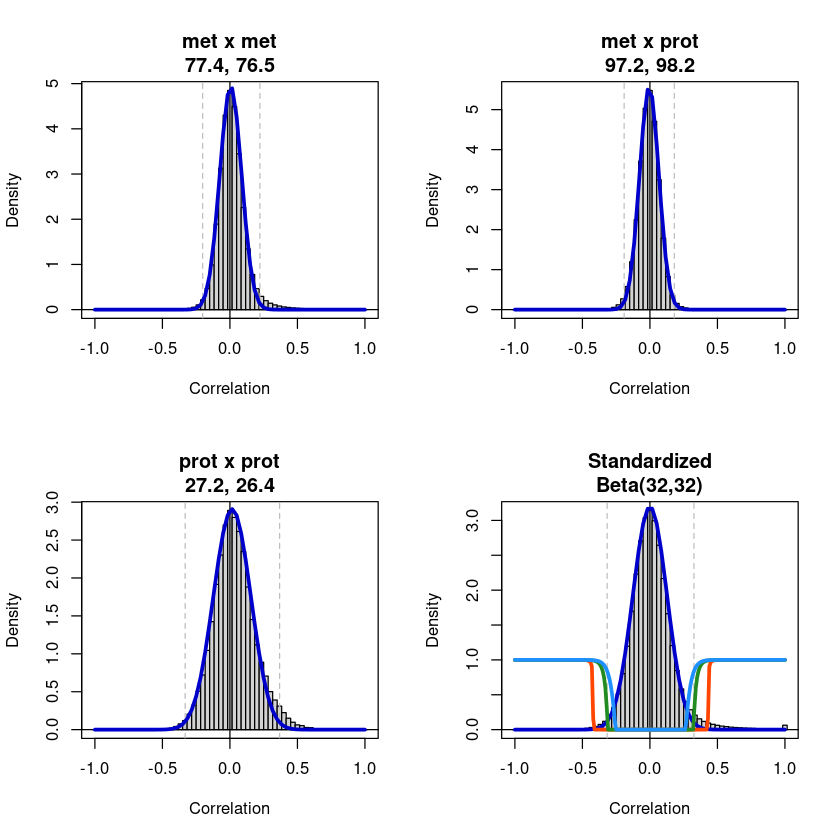

In [40]:
# Both datasets are internal
par(mfrow=c(2,2))
L <- multiOmicModel(list(met = Met, prot = Prot), plot=TRUE, annotate=TRUE, fine=30)

v.std <- 32
Z <- standardizeFromModel(L$modelL, L$analyteL, v.std)
adjTable1 <- nullModelAdjacencyTable(Z[row(Z) < col(Z)], v.std, scale=1)
adjTable2 <- nullModelAdjacencyTable(Z[row(Z) < col(Z)], v.std) # by default, scale is 2
adjTable3 <- nullModelAdjacencyTable(Z[row(Z) < col(Z)], v.std, scale=3)

shape <- estimateShape(Z[row(Z) < col(Z)], plot=TRUE, main = "Standardized", fine=30)
title(paste("Beta(",v.std,",",v.std,")",sep=''), line = 0.5)
Bs <- c(-100:100)/100
lines(Bs,interpolatedAdjacency(Bs,adjTable1),lwd=3,col='orangered')
lines(Bs,interpolatedAdjacency(Bs,adjTable2),lwd=3,col='forestgreen')
lines(Bs,interpolatedAdjacency(Bs,adjTable3),lwd=3,col='dodgerblue')

## Other tests